# MECANISMO CINCO BARRAS

## ANIMACIÓN

In [1]:
#! /usr/bin/env python

import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as animation
import scipy.integrate as integrate 
import os
from time import sleep
#%matplotlib inline (Para notebook)



print ('MECANISMO DE CINCO BARRAS')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3:'))
meca["L4"] = float (input ('Introduce longitud L4: '))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["beta"] = float (input('Introduce angulo inicial beta: ')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [meca["L1"]], [1], [0.2], [meca["XB"]+meca["L4"]], [0.1], [meca["theta"]], [meca["beta"]]])
print('q: ' + str(q))

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((8,8))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = -2*(X3-X2)
    Jacob[2,3] = -2*(Y3-Y2)
    Jacob[2,4] = 2*(X3-X2)
    Jacob[2,5] = 2*(Y3-Y2)
    Jacob[3,4] = -2*(meca["XB"]-X3)
    Jacob[3,5] = -2*(meca["YB"]-Y3)

    if (abs(math.cos(theta)) < 0.95 ):
        Jacob[4,6] = meca["L1"]*math.sin(theta)
        Jacob[4,0] = 1
    else:
        Jacob[4,6] = -meca["L1"]*math.cos(theta)
        Jacob[4,1] = 1


    if (abs(math.cos(beta)) < 0.95 ):
        Jacob[5,7] = meca["L4"]*math.sin(beta)
        Jacob[5,4] = 1
    else:
        Jacob[5,7] = -meca["L4"]*math.cos(beta)
        Jacob[5,5] = 1

    Jacob[6,6] = 1
    Jacob[7,7] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((8,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
	
    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (X3-X2)**2 + (Y3-Y2)**2 - meca["L3"]**2
    Phi[3] = (meca["XB"] - X3)**2 + (meca["YB"] - Y3)**2 - meca["L4"]**2

    if (abs(math.cos(theta)) < 0.95 ):
        Phi[4] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[4] = Y1-meca["L1"]*math.sin(theta)
		
    if (abs(math.cos(beta)) < 0.95 ):
        Phi[5] = (X3-meca["XB"])-meca["L4"]*math.cos(beta)
    else: 
        Phi[5] = Y3-meca["L4"]*math.sin(beta)
		
    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((8,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        #print("q=")
        #pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        X3 = q[4]
        Y3 = q[5]
        theta = q[6]
        beta = q[7]
       
        fi=Phi(q,meca)

        J = jacob_Phiq(q,meca)

        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1
        
    if (error > tolerancia):
        raise Exception ('No se puede alcanzar la posición')


    return q


def dibuja_mecanismo(q, meca):


    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
    
	
    plt.axis('equal')
    
    
    plt.plot ([meca["XA"], X1], [meca["YA"], Y1])    #[pos inicial (x1,x2), pos final (y1,y2)]
    plt.plot ([X1, X2], [Y1, Y2])  
    plt.plot ([X2, X3], [Y2, Y3])  
    plt.plot([X3,meca["XB"]], [Y3, meca["YB"]])
	
    plt.plot(meca["XA"], meca["YA"], 'bo')  
    plt.plot(meca["XB"], meca["YB"], 'go')
	
    plt.show()#block=False) 
    return






MECANISMO DE CINCO BARRAS
Introduce longitud L1:1
Introduce longitud L2:2
Introduce longitud L3:2
Introduce longitud L4: 1
Introduce angulo inicial theta:0
Introduce angulo inicial beta: 0
Introduce coordenada en x del punto B:4
q: [[0.1]
 [1. ]
 [1. ]
 [0.2]
 [5. ]
 [0.1]
 [0. ]
 [0. ]]


Exception: No se puede alcanzar la posición

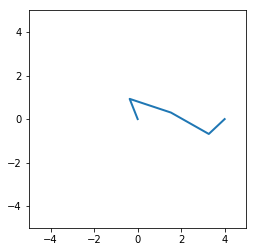

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( -5, 5))
ax.set_ylim((-5,5))
ax.set_aspect('equal')

line, = ax.plot([], [], lw=2)

last_q = q

def init():
    line.set_data([], [])
    return (line,)

def animate(i,q,meca):
    global last_q
    q = last_q
    # i: contador de iteracion: hay que mapearla a un ángulo de la manivela
    omega=2*3.14159/100  # vel. angular
    q[6] = i*omega
    q[7] = i*omega*2

    #llamar problema de pos:    
    q = resuelve_prob_posicion(q, meca)
    last_q = q
    
    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
        
    x=[meca["XA"], X1, X2, X3, meca["XB"]]
    y=[meca["YA"], Y1, Y2, Y3, meca["YB"]]
  
    
    line.set_data(x, y)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(q,meca),
                               frames=100, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())


In [ ]:
i=0

while (i<200):
      
    q[6] = i*5*3.14159/180
    q[7] = i*5*3.14159/180
    q = resuelve_prob_posicion(q,meca)
    print ("q")
    pprint.pprint (q)
    dibuja_mecanismo(q,meca) 
    sleep(0.2)
    i= i+1

